### Quá trình Wiener

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def draw_Wiener(m):
    n=300
    t = np.linspace(0, 1, n + 1)
    h = np.diff(t[:2])[0]
    dw = np.sqrt(h) * np.random.randn(n, m) 
    w = np.cumsum(np.vstack([np.zeros((1, m)), dw]), axis=0) 
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'lime']
    
    plt.figure(figsize=(8,6))
    for i in range(m):
        sns.lineplot(x=t,
                     y=w[:, i],
                     label=f'Quá trình {i+1}',
                     color=colors[i]
        )
    plt.xlabel('Thời gian (t)')
    plt.ylabel('W(t)')
    plt.title('Quá trình Wiener',fontsize=15)
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.tight_layout()
    plt.show()
    
    if m>=2:
        fig,axes =plt.subplots(1,m,figsize=(12,3))
        for i in range(m):
            sns.lineplot(x=t,
                         y=w[:, i],
                         label=f'Quá trình {i+1}',
                         ax=axes[i],
                         color=colors[i]
            )
            axes[i].set_xlabel('Thời gian (t)')
            axes[i].set_ylabel('#')
            axes[i].set_title(f'Quá trình Wiener {i+1}',fontsize=15)
            axes[i].grid(True)
        plt.tight_layout()
        plt.show()


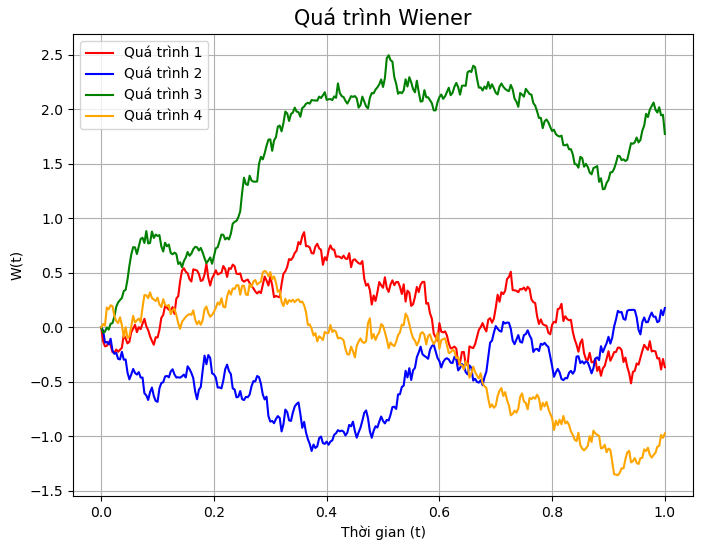

<Figure size 640x480 with 0 Axes>

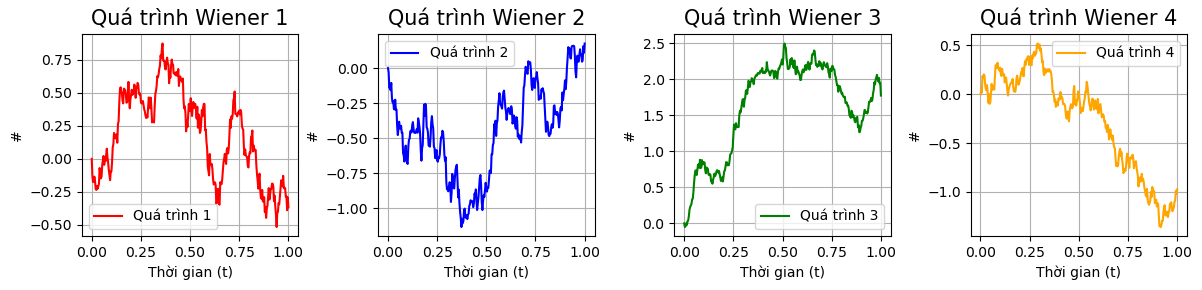

In [94]:
draw_Wiener(4)

### Gauss

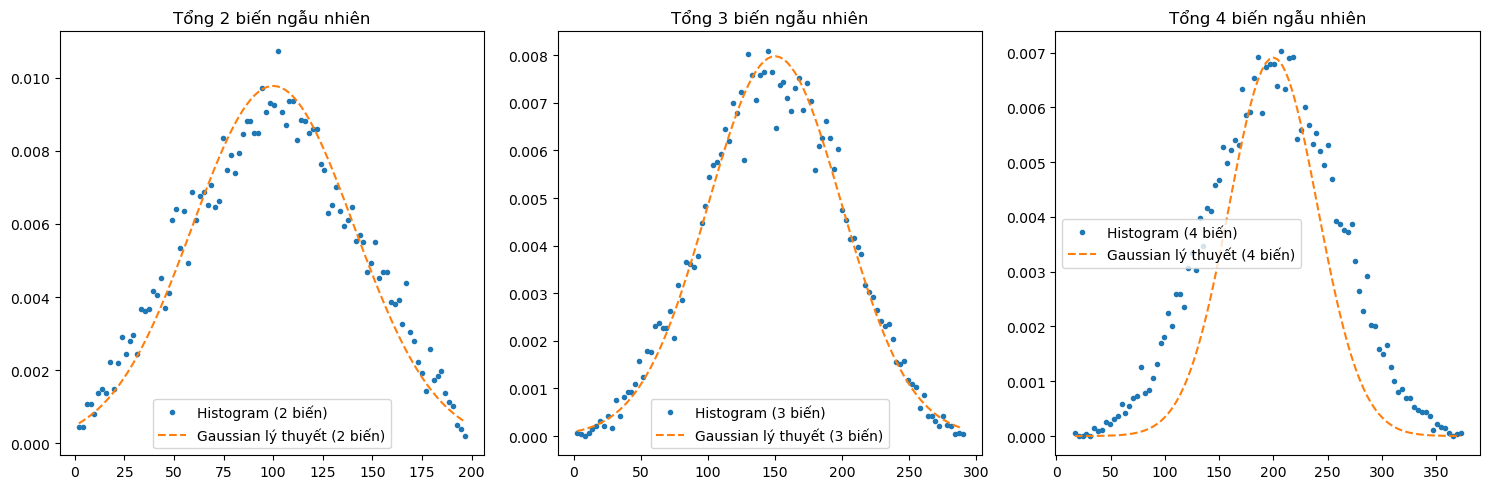

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Các tham số
a = 100
leng = int(1e4)  # Số lượng mẫu
bins = 100  # Số lượng bins trong histogram

# Sinh các biến ngẫu nhiên đồng đều (uniform) X1, X2
X1 = a * np.random.rand(leng)
X2 = a * np.random.rand(leng)
W2 = X1 + X2

# Vẽ histogram cho tổng 2 biến ngẫu nhiên
y2, n2 = np.histogram(W2, bins)
y2 = y2 / leng / (n2[1] - n2[0])  # Chuẩn hóa histogram
n2 = n2[:-1]  # Loại bỏ phần tử cuối trong n2

# Phân phối chuẩn lý thuyết cho tổng 2 biến ngẫu nhiên (Gaussian)
gauss_y2 = np.exp(-(n2 - a)**2 / (a**2 / 3)) / np.sqrt(np.pi * a**2 / 3)

# Trường hợp 3 biến
X3 = a * np.random.rand(leng)
W3 = W2 + X3
y3, n3 = np.histogram(W3, bins)
y3 = y3 / leng / (n3[1] - n3[0])
n3 = n3[:-1]

gauss_y3 = np.exp(-(n3 - 3 * a / 2)**2 / (a**2 / 2)) / np.sqrt(np.pi * a**2 / 2)

# Trường hợp 4 biến
X4 = a * np.random.rand(leng)
W4 = W3 + X4
y4, n4 = np.histogram(W4, bins)
y4 = y4 / leng / (n4[1] - n4[0])
n4 = n4[:-1]

gauss_y4 = np.exp(-(n4 - 2 * a)**2 / (a**2 / 3)) / np.sqrt(np.pi * 2 * a**2 / 3)

# Vẽ đồ thị
plt.figure(figsize=(15, 5))

# Vẽ histogram và phân phối Gaussian cho 2 biến ngẫu nhiên
plt.subplot(1, 3, 1)
plt.plot(n2, y2, '.', label="Histogram (2 biến)")
plt.plot(n2, gauss_y2, label="Gaussian lý thuyết (2 biến)", linestyle='--')
plt.title("Tổng 2 biến ngẫu nhiên")
plt.legend()

# Vẽ histogram và phân phối Gaussian cho 3 biến ngẫu nhiên
plt.subplot(1, 3, 2)
plt.plot(n3, y3, '.', label="Histogram (3 biến)")
plt.plot(n3, gauss_y3, label="Gaussian lý thuyết (3 biến)", linestyle='--')
plt.title("Tổng 3 biến ngẫu nhiên")
plt.legend()

# Vẽ histogram và phân phối Gaussian cho 4 biến ngẫu nhiên
plt.subplot(1, 3, 3)
plt.plot(n4, y4, '.', label="Histogram (4 biến)")
plt.plot(n4, gauss_y4, label="Gaussian lý thuyết (4 biến)", linestyle='--')
plt.title("Tổng 4 biến ngẫu nhiên")
plt.legend()

plt.tight_layout()
plt.show()
